In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# dataset for the demo
#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler


In [ ]:
data = pd.read_csv('/content/sample_data/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

data.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('medv', axis=1),
                                                    data['medv'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape


((354, 13), (152, 13))

In [ ]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [ ]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([4.20796230e+00, 1.03256579e+01, 1.12719079e+01, 7.89473684e-02,
       5.51426974e-01, 6.22922368e+00, 6.75986842e+01, 3.87092895e+00,
       1.00065789e+01, 4.23269737e+02, 1.84138158e+01, 3.47527895e+02,
       1.31477632e+01])

In [ ]:
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_

array([9.12464924e+00, 2.25017733e+01, 6.53789548e+00, 2.69656599e-01,
       1.16453003e-01, 7.00904624e-01, 2.83796814e+01, 2.18964758e+00,
       8.77158744e+00, 1.62674642e+02, 2.01846898e+00, 1.02693680e+02,
       7.26026254e+00])

In [ ]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


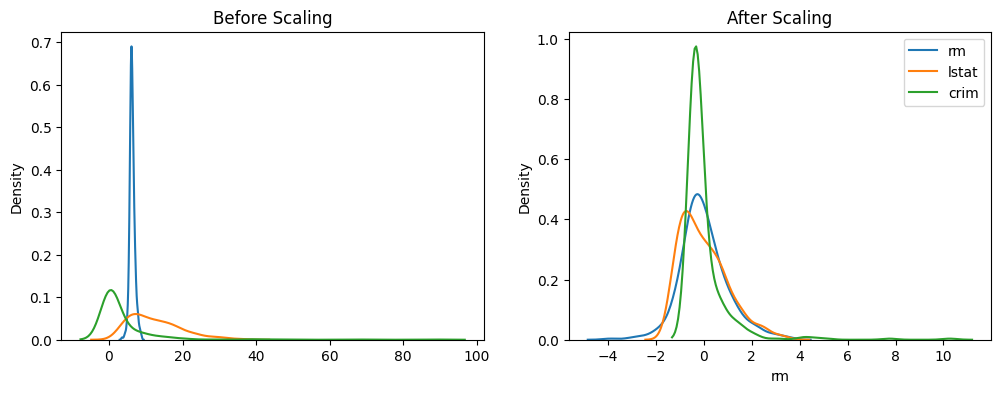

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['rm'].values, ax=ax1, label='rm')
sns.kdeplot(X_train['lstat'].values, ax=ax1, label='lstat')
sns.kdeplot(X_train['crim'].values, ax=ax1, label='crim')

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['rm'], ax=ax2, label='rm')
sns.kdeplot(X_train_scaled['lstat'], ax=ax2, label='lstat')
sns.kdeplot(X_train_scaled['crim'], ax=ax2, label='crim')

plt.legend()
plt.show()


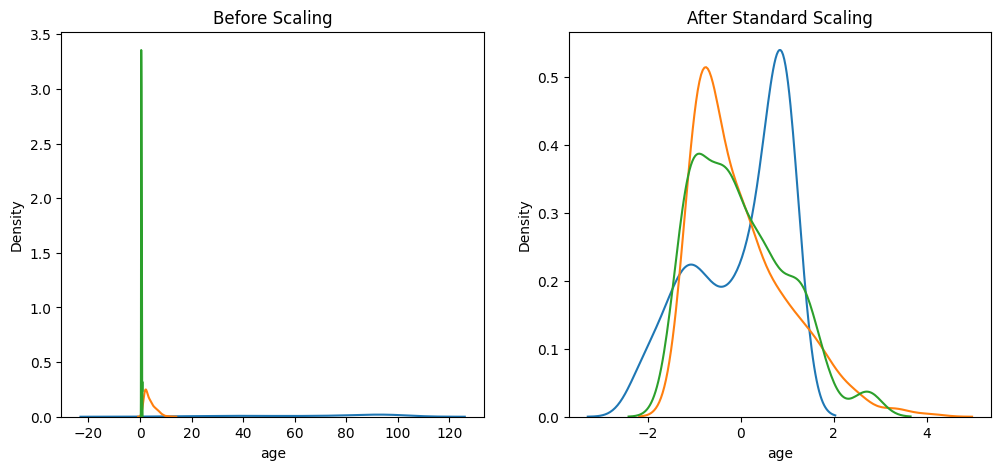

In [ ]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['age'], ax=ax1)
sns.kdeplot(X_train['dis'], ax=ax1)
sns.kdeplot(X_train['nox'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['age'], ax=ax2)
sns.kdeplot(X_train_scaled['dis'], ax=ax2)
sns.kdeplot(X_train_scaled['nox'], ax=ax2)
plt.show()

In [ ]:
X_train['age'].min(), X_train['age'].max()

(2.9, 100.0)

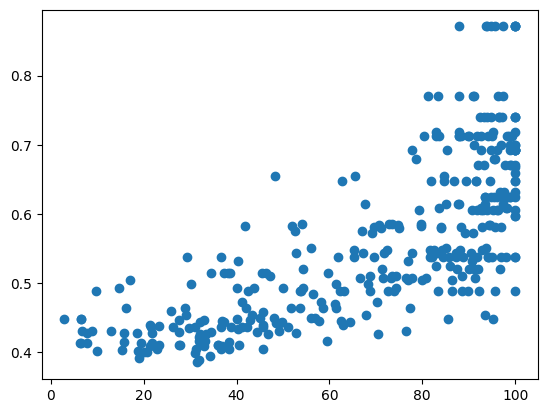

In [ ]:
plt.scatter(X_train['age'], X_train['nox'])


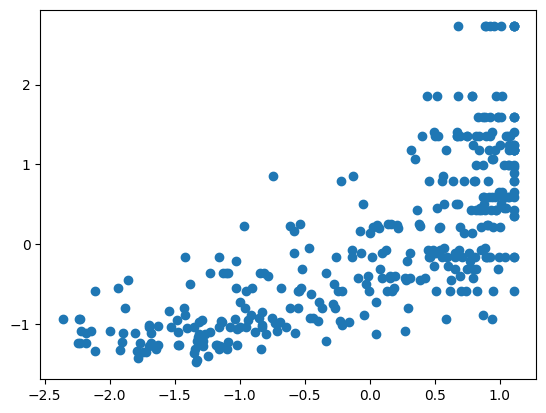

In [ ]:
plt.scatter(X_train_scaled['age'], X_train_scaled['nox'])
